In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datasets
from sklearn.datasets import load_iris, load_digits, load_breast_cancer

# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

## First Experiment

In [3]:
data = load_digits()
X,Y = load_digits(return_X_y=True)
print('Target names',data.target_names)
print('data shape',data.data.shape)
print('X',X.shape)
print('Y',len(Y),np.unique(Y,return_counts=True))

Target names [0 1 2 3 4 5 6 7 8 9]
data shape (1797, 64)
X (1797, 64)
Y 1797 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


### Randomly divide the data into training (70%) and testing (30%) sets

In [4]:
X,Y = load_digits(return_X_y=True)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=0) #Test 30%, training 70%

print('X:',X.shape,'Y:',len(Y) )
print('Xtrain:',Xtrain.shape,'Ytrain:',len(Ytrain) )
print('Xtest:',Xtest.shape,'Ytest:',len(Ytest) )
print('Ytest:',Ytest)

X: (1797, 64) Y: 1797
Xtrain: (1257, 64) Ytrain: 1257
Xtest: (540, 64) Ytest: 540
Ytest: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 

### Generate three classification models (Naive Bayes, Logistic Regression, Decision Tree)

#### - Naive Bayes

In [18]:
model = GaussianNB()
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

# Accuracy
print('*Accuracy:', accuracy_score(Ytest,Ypred))
# Macro-f1
print('*Macro-f1:', f1_score(Ytest,Ypred,average='macro'))
# Confusion Matrix
print('*Confusion Matrix:')
m = confusion_matrix(Ytest,Ypred)
m = m.transpose()
m = np.round( (m/np.sum(m,axis=0))*100, 1).transpose() #para que salga en porcentaje
df = pd.DataFrame(m,index=data.target_names,columns=data.target_names)
df

*Accuracy: 0.847457627118644
*Macro-f1: 0.8641666666666665
*Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,85.7,0.0,0.0,0.0,0.0,0.0,0.0,14.3,0.0
2,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0
3,0.0,0.0,14.3,71.4,0.0,0.0,0.0,0.0,14.3,0.0
4,0.0,11.1,0.0,0.0,77.8,0.0,0.0,0.0,11.1,0.0
5,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
8,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


#### - Logistic Regression

In [6]:
model = LogisticRegression(random_state=0)
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

# Accuracy
print('*Accuracy:', accuracy_score(Ytest,Ypred))
# Macro-f1
print('*Macro-f1:', f1_score(Ytest,Ypred,average='macro'))
# Confusion Matrix
print('*Confusion Matrix:')
m = confusion_matrix(Ytest,Ypred)
m = m.transpose()
m = np.round( (m/np.sum(m,axis=0))*100,1).transpose() #para que salga en porcentaje
df = pd.DataFrame(m,index=data.target_names,columns=data.target_names)
df

*Accuracy: 0.9537037037037037
*Macro-f1: 0.955208755711063
*Confusion Matrix:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1,2,3,4,5,6,7,8,9
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,94.2,0.0,0.0,0.0,0.0,0.0,0.0,3.8,1.9
2,0.0,3.8,92.5,3.8,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,96.3,0.0,0.0,0.0,0.0,1.9,1.9
4,0.0,0.0,0.0,0.0,97.9,0.0,0.0,2.1,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,96.5,0.0,0.0,0.0,3.5
6,0.0,1.7,0.0,0.0,0.0,0.0,98.3,0.0,0.0,0.0
7,0.0,0.0,0.0,1.9,1.9,0.0,0.0,96.2,0.0,0.0
8,0.0,4.9,1.6,0.0,0.0,0.0,0.0,0.0,86.9,6.6
9,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.0,1.8,96.5


#### - Decision Tree

In [7]:
model = DecisionTreeClassifier(random_state=0)
model.fit(Xtrain,Ytrain)
Ypred = model.predict(Xtest)

# Accuracy
print('*Accuracy:', accuracy_score(Ytest,Ypred))
# Macro-f1
print('*Macro-f1:', f1_score(Ytest,Ypred,average='macro'))
# Confusion Matrix
print('*Confusion Matrix:')
m = confusion_matrix(Ytest,Ypred)
m = m.transpose()
m = np.round( (m/np.sum(m,axis=0))*100,1).transpose() #para que salga en porcentaje
df = pd.DataFrame(m,index=data.target_names,columns=data.target_names)
df

*Accuracy: 0.8574074074074074
*Macro-f1: 0.8591807712816509
*Confusion Matrix:


,0,1,2,3,4,5,6,7,8,9
0,93.3,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.0,4.4
1,0.0,86.5,0.0,0.0,3.8,0.0,3.8,1.9,1.9,1.9
2,1.9,0.0,81.1,5.7,1.9,0.0,0.0,0.0,3.8,5.7
3,0.0,0.0,3.7,83.3,0.0,1.9,3.7,0.0,7.4,0.0
4,2.1,0.0,0.0,0.0,89.6,0.0,4.2,0.0,4.2,0.0
5,0.0,0.0,1.8,1.8,1.8,89.5,0.0,0.0,0.0,5.3
6,0.0,3.3,1.7,0.0,5.0,0.0,90.0,0.0,0.0,0.0
7,1.9,1.9,0.0,0.0,0.0,0.0,0.0,92.5,1.9,1.9
8,4.9,4.9,3.3,6.6,0.0,0.0,0.0,3.3,70.5,6.6
9,0.0,0.0,1.8,5.3,0.0,3.5,0.0,1.8,3.5,84.2


## Second Experiment

### Randomly divide the data into 30 splits using K-fold

In [8]:
X,Y = load_digits(return_X_y=True)
kf = KFold(n_splits=30, random_state=0, shuffle=True)

#For each iteration:
#    *Create 3 models:
#       -naive bayes
#       -logistic regression
#       -decision tree
#    *Calculate and save for each model the macro-F1
resNaive,resLog,resDes = [],[],[]
for train_idx, test_idx in kf.split(X): #aquí verdaderamente hace split
    Xtrain, Ytrain = X[train_idx,:], Y[train_idx]
    Xtest, Ytest = X[test_idx,:], Y[test_idx]
    #Naive Bayes
    model = GaussianNB()
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resNaive.append(f1_score(Ytest,Ypred,average='macro'))
    #Logistic Regression
    model = LogisticRegression(random_state=0)
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resLog.append(f1_score(Ytest,Ypred,average='macro'))
    #Decision Tree
    model = DecisionTreeClassifier(random_state=0)
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resDes.append(f1_score(Ytest,Ypred,average='macro'))
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Generate a visualization with three boxplots (each one per type of model) showing the values of macro-F1

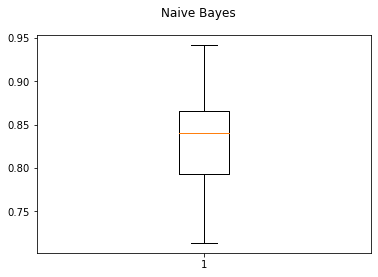

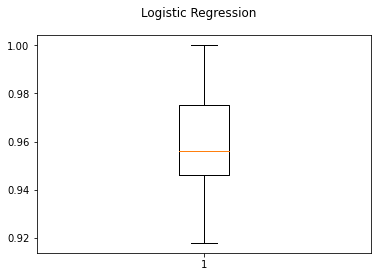

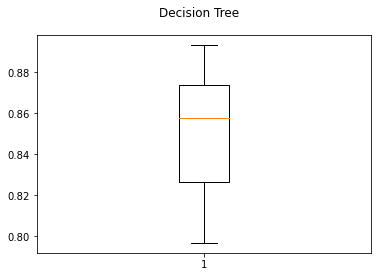

In [9]:
#print(resNaive)
plt.figure()
plt.boxplot(resNaive)
plt.suptitle('Naive Bayes')
plt.show()

plt.figure()
plt.boxplot(resLog)
plt.suptitle('Logistic Regression')
plt.show()

plt.figure()
plt.boxplot(resDes)
plt.suptitle('Decision Tree')
plt.show()
#resNaive = resLog = resDes = []

### Finally, write a small paragraph analyzing the results describing which one is the best model for this kind of data.

<sub>After analyzing each model, we can see that the 'Logistic Regression' model presents better results than the others. For example, in the first experiment, its accuracy was the closest to 1 (>9.5), which beat the others, which got an accuracy below 0.9.</sub>

<sub>Also, we can see that the 'Naive Bayes' model has the biggest range of the three models. This means it's results vary quite a bit.</sub>

<sub>In conclusion, if we could order the models from best to worst it would be:</sub>

    
      1. Logistic Regression
      2. Decision Tree
      3. Naive Bayes
    
